In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('/home/zuko/Desktop/Maths/Sans nom 1.csv',low_memory=False)

In [3]:
#on réaligne certaines lignes décallées des colonnes
matching_rows = df.crit1.str.contains('[a-zA-Z]', regex= True, na=False)
while True in matching_rows.to_numpy(): 
    df.loc[matching_rows, 'crit1':] = df.loc[matching_rows, 'crit1':].shift(-1, axis = 1)
    matching_rows = df.crit1.str.contains('[a-zA-Z]', regex= True, na=False)
matching_rows.unique()

array([False])

In [4]:
matching_rows = df.natlty1.str.contains('[a-zA-Z]', regex= True, na=False)
while True in matching_rows.to_numpy(): 
    df.loc[matching_rows, 'natlty1':] = df.loc[matching_rows, 'natlty1':].shift(-1, axis = 1)
    matching_rows = df.natlty1.str.contains('[a-zA-Z]', regex= True, na=False)
matching_rows.unique()

array([False])

In [5]:
matching_rows = df.guncertain1.str.contains('[a-zA-Z]', na=False)
while True in matching_rows.to_numpy(): 
    df.loc[matching_rows, 'guncertain1':] = df.loc[matching_rows, 'guncertain1':].shift(-1, axis = 1)
    matching_rows = df.guncertain1.str.contains('[a-zA-Z]', na=False)
matching_rows.unique()

array([False])

In [6]:
matching_rows = df.claim2.str.contains('[a-zA-Z]', regex= True, na=False)
while True in matching_rows.to_numpy(): 
    df.loc[matching_rows, 'claim2':] = df.loc[matching_rows, 'claim2':].shift(-1, axis = 1)
    matching_rows = df.claim2.str.contains('[a-zA-Z]', regex= True, na=False)
matching_rows.unique()

array([False])

In [7]:
matching_rows = df.weaptype1_txt.str.contains('\d', regex= True, na=False)
while True in matching_rows.to_numpy(): 
    df.loc[matching_rows, 'weaptype1_txt':] = df.loc[matching_rows, 'weaptype1_txt':].shift(-1, axis = 1)
    matching_rows = df.weaptype1_txt.str.contains('\d', regex= True, na=False)
matching_rows.unique()

array([False])

In [8]:
#on selectionne les var pertinentes pour notre étude
df2 = df[['country_txt','region_txt','latitude','longitude','doubtterr','multiple','success',\
        'suicide','attacktype1_txt','targtype1_txt','natlty1_txt','nperpcap','weaptype1_txt',\
        'nkill','nkillter','nwound','INT_LOG']]

In [9]:
#y a-t-il des nan?
for i in range(len(df2.columns)):
    if (df2[df2.columns[i]].isnull().sum() != 0):#.values):
        print(df2[df2.columns[i]].isnull().sum())
    else:
        print(f"plus de nan (total de nan colonne {i} = {df2[df2.columns[i]].isnull().sum()})")

plus de nan (total de nan colonne 0 = 0)
plus de nan (total de nan colonne 1 = 0)
47
47
plus de nan (total de nan colonne 4 = 0)
plus de nan (total de nan colonne 5 = 0)
plus de nan (total de nan colonne 6 = 0)
plus de nan (total de nan colonne 7 = 0)
plus de nan (total de nan colonne 8 = 0)
plus de nan (total de nan colonne 9 = 0)
157
plus de nan (total de nan colonne 11 = 0)
1
616
302
959
1


In [10]:
for i in range(len(df2.columns)):
    print(df2.columns[i], df2[df2.columns[i]].unique())

country_txt ['Afghanistan' 'Sudan' 'Democratic Republic of the Congo' 'Turkey' 'Syria'
 'Pakistan' 'Italy' 'Somalia' 'Yemen' 'Bahrain' 'Myanmar' 'Burundi' 'Iraq'
 'Egypt' 'Burkina Faso' 'India' 'Algeria' 'United States' 'Philippines'
 'Greece' 'Mali' 'Libya' 'Central African Republic' 'Nigeria' 'Lebanon'
 'Mexico' 'Cameroon' 'Ethiopia' 'Kyrgyzstan' 'Serbia' 'Sweden' 'Thailand'
 'Iran' 'France' 'United Kingdom' 'West Bank and Gaza Strip' 'Ukraine'
 'Paraguay' 'Colombia' 'Malaysia' 'Russia' 'Kosovo' 'South Africa' 'Chile'
 'Kenya' 'Israel' 'Saudi Arabia' 'China' 'Nepal' 'Ecuador' 'Niger'
 'Venezuela' 'South Sudan' 'Canada' 'Bangladesh' 'Tajikistan' 'Angola'
 'Ireland' 'Peru' 'Dominican Republic' 'Poland' 'Jordan' 'Azerbaijan'
 'Mozambique' 'Indonesia' 'Germany' 'Brazil' 'Macedonia' 'Tunisia'
 'Uganda' 'Chad' 'Finland' 'Australia' 'Norway' 'Vietnam' 'Tanzania'
 'Sierra Leone' 'Sri Lanka' 'Maldives' 'Belgium' 'Rwanda' 'Honduras'
 'Czech Republic' 'Malta' 'Gabon' 'Laos' 'Djibouti' 'Austria'

### PARTIE ACP

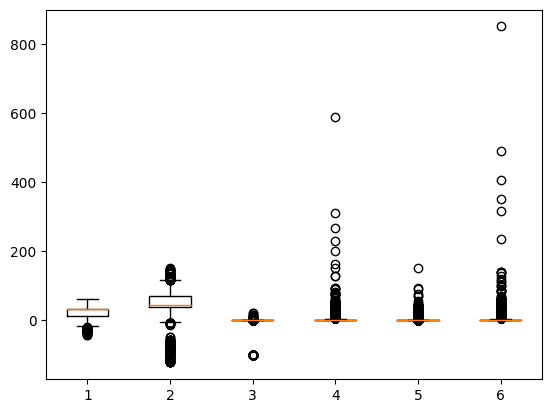

In [11]:
#sous echantillon pour la pca
dpca = df[['latitude','longitude','nperpcap', 'nkill','nkillter','nwound']]
dpca = dpca.dropna()
#prepa donnees on ne prends que les var quant
dpca = dpca.astype(int)
#on def une var aléatoire
X = dpca.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
#centrage réduction
X_scaled = scaler.fit(X).transform(X)
#scaler = StandardScaler() # instanciation de l'objet scaler
#X_scaled = scaler.fit_transform(X)
plt.boxplot(X)
plt.show()

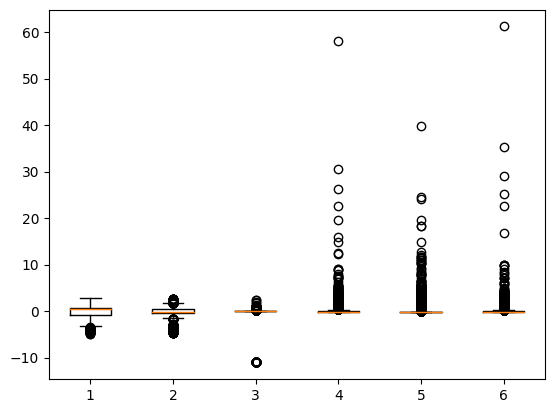

In [12]:
plt.boxplot(X_scaled)
plt.show()

Pourcentage de variance expliquée : 
Composantes principales : 
[[ 0.08054457 -0.08717586 -0.00221448  0.67639141  0.51100815  0.51698488]
 [-0.73074664  0.61459916 -0.26752571  0.0926168   0.005212    0.09001205]
 [-0.07658551 -0.47079107 -0.81905771 -0.03881361 -0.23490594  0.2120085 ]
 [-0.4327907  -0.36230505  0.50059701  0.02997795 -0.48144261  0.44513395]
 [ 0.51426343  0.51160733 -0.07795999 -0.01636803 -0.47244237  0.49421007]
 [ 0.04338097  0.00412266 -0.02990717  0.72886467 -0.47819862 -0.48712322]]


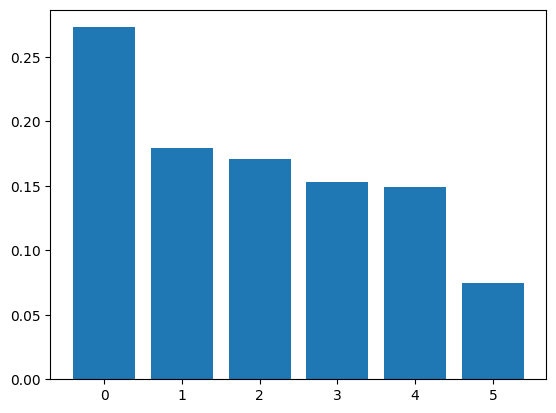

In [13]:
#calcul composantes
from sklearn.decomposition import PCA
pca = PCA()#n_components=3?)
p = pca.fit(X_scaled)
x = np.arange(X.shape[1])
print("Pourcentage de variance expliquée : ")
plt.bar(x, p.explained_variance_ratio_)
print("Composantes principales : ")
#les coordonnées des PC dans le repère des vecteurs variables de depart
print(p.components_)

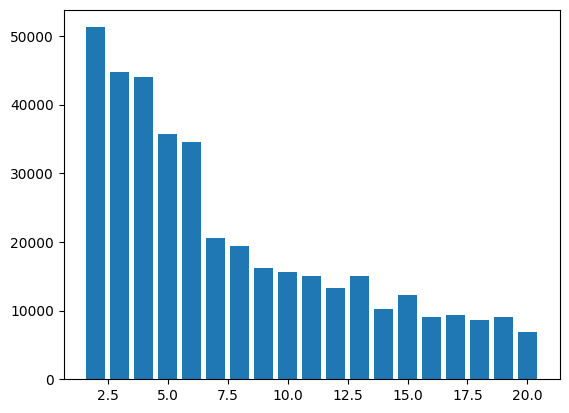

In [14]:
#y a-t-il des groupes en forme de boules?
from sklearn.cluster import KMeans
array = []
for i in range(2,21):
    kmeans_i = KMeans(n_clusters=i, n_init=1, init='random').fit(X_scaled)
    inertie = kmeans_i.inertia_
    array.append(inertie)
plt.bar(range(2,21), array)
plt.show()

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(X)
pred = kmeans.predict(X)

In [16]:
#cette ligne de code tirée d'une discussion sur stackoverflow non retrouvée
PCnames = ['PC'+str(i+1) for i in range(p.n_components_)]
Loadings = pd.DataFrame(p.components_,columns=PCnames,index=dpca.columns)
Loadings

,PC1,PC2,PC3,PC4,PC5,PC6
latitude,0.080545,-0.087176,-0.002214,0.676391,0.511008,0.516985
longitude,-0.730747,0.614599,-0.267526,0.092617,0.005212,0.090012
nperpcap,-0.076586,-0.470791,-0.819058,-0.038814,-0.234906,0.212008
nkill,-0.432791,-0.362305,0.500597,0.029978,-0.481443,0.445134
nkillter,0.514263,0.511607,-0.077960,-0.016368,-0.472442,0.494210
nwound,0.043381,0.004123,-0.029907,0.728865,-0.478199,-0.487123


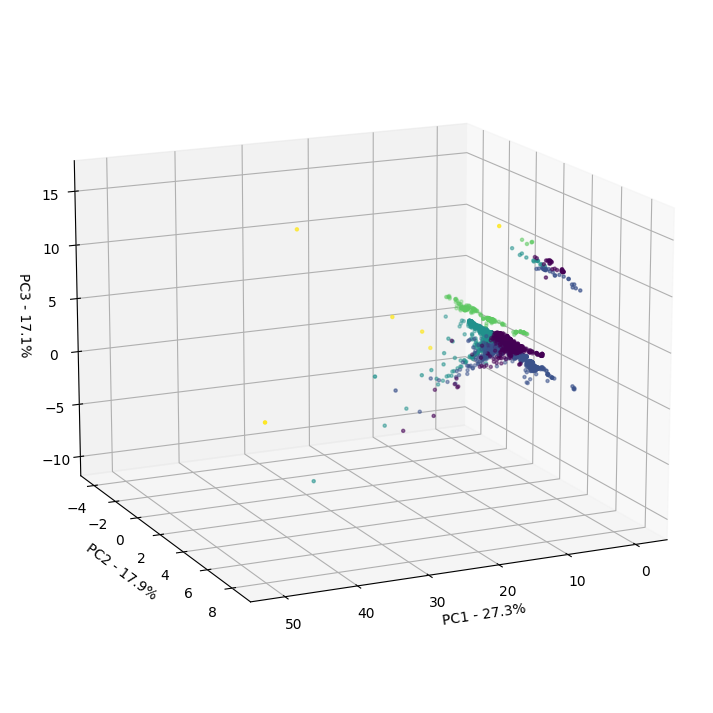

In [17]:
#projection!
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d', elev=15, azim=65)
comp = p.transform(X_scaled)
# La couleur des points dépend de leur étiquette issue de kmeans 11 (label)
ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=kmeans.labels_, marker=".")
ax.set_xlabel(f"PC1 - {100*p.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*p.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*p.explained_variance_ratio_[2]:.1f}%")

plt.show()

### CAH

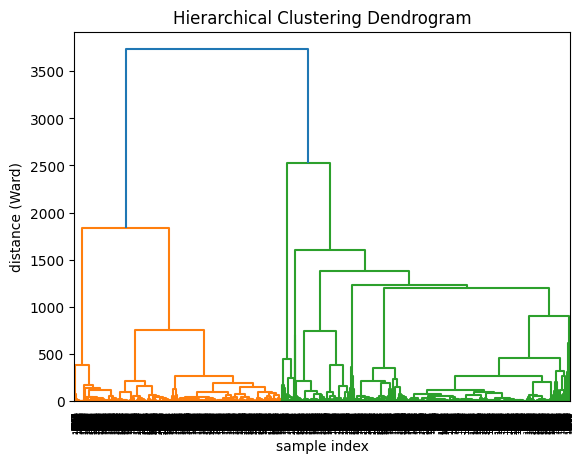

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(X, 'ward')
# Plot title
plt.title('Hierarchical Clustering Dendrogram')
# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
# Make the dendrogram
dendrogram(Z, labels=dpca.index, leaf_rotation=90)
# Show the graph
plt.show()

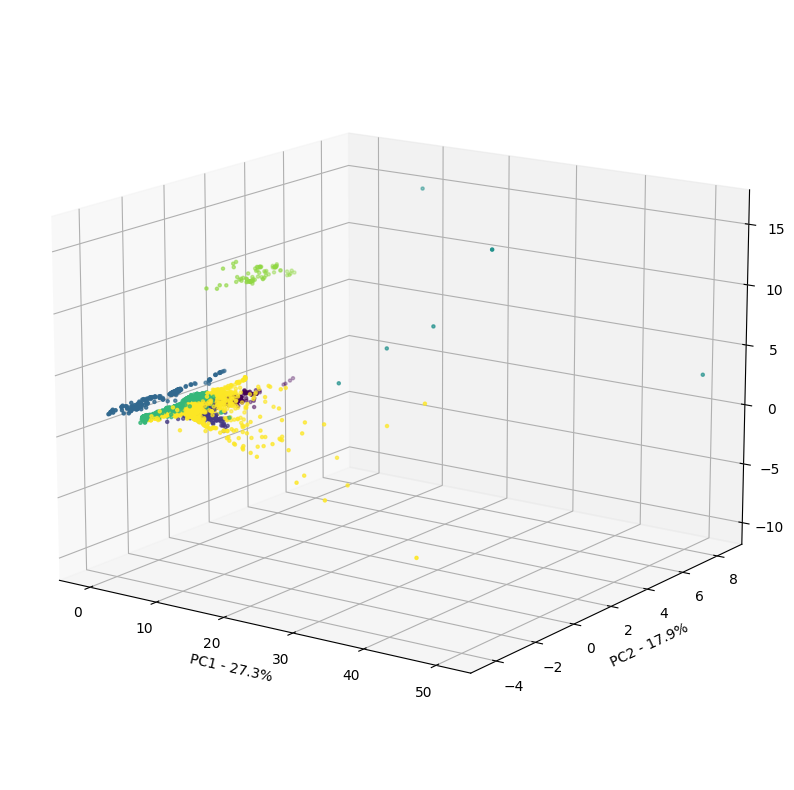

In [26]:
#on lit ~7 groupes
clust = fcluster(Z, 7, criterion='maxclust')
#dict_group = {"event":dpca.index, "group":clust}
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d', elev=15, azim=-55)
comp = p.transform(X_scaled)
# La couleur des points dépend de leur étiquette issue de CAH 7
ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=clust, marker=".")
ax.set_xlabel(f"PC1 - {100*p.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*p.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*p.explained_variance_ratio_[2]:.1f}%")

plt.show()

In [20]:
#log transformation des var quant?

In [21]:
#on calcule une matrice de variance covariance sur des données normalisées
#cela revient à calculer une matrice de corrélation
corrM = np.cov(X_scaled, rowvar=False)
corrDf = pd.DataFrame(corrM,columns=dpca.columns,index=dpca.columns)

triangleV = (corrDf.where(np.triu(np.ones(corrDf.shape), k=0).astype(bool)))
                  #.stack()
                  #.sort_values(ascending=False))
print(triangleV)
print(f"Rq : la corrélation des var avec elles mêmes = {corrM[0][0].round(2)}")

           latitude  longitude  nperpcap     nkill  nkillter    nwound
latitude   1.000103  -0.077270  0.038084  0.014331  0.046822  0.021527
longitude       NaN   1.000103  0.015771 -0.032884 -0.012932 -0.039697
nperpcap        NaN        NaN  1.000103  0.008629  0.011182 -0.028349
nkill           NaN        NaN       NaN  1.000103  0.413090  0.418877
nkillter        NaN        NaN       NaN       NaN  1.000103  0.080895
nwound          NaN        NaN       NaN       NaN       NaN  1.000103
Rq : la corrélation des var avec elles mêmes = 1.0


In [22]:
#on sort un échantillon cleané
df2 = df2.sample(800)
df2 = df2.dropna()
df2.shape

(716, 17)

In [23]:
#on met en forme les var qualitatives
df2.doubtterr = df2.doubtterr.replace({0: 'terr',
                                       1: 'doubt_terr'})
df2.multiple = df2.suicide.replace({0: 'noseries_attack',
                                   1: 'within_series'})
df2.success = df2.suicide.replace({0: 'realized_attack',
                                   1: 'no_attack'})
df2.suicide = df2.suicide.replace({0: 'no_suicide',
                                   1: 'suicide_attack'})
df2.INT_LOG = df2.INT_LOG.astype(int).replace({0: 'domestic_attack',
                                               1: 'international_attack',
                                               -9: 'internat_unkown'})

In [24]:
df2[:3]

,country_txt,region_txt,latitude,longitude,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,nperpcap,weaptype1_txt,nkill,nkillter,nwound,INT_LOG
8668,Somalia,Sub-Saharan Africa,2.047631,44.897629,doubt_terr,noseries_attack,realized_attack,no_suicide,Armed Assault,Military,Somalia,0,Firearms,4,3.0,4.0,domestic_attack
9011,India,South Asia,33.775125,74.831705,terr,noseries_attack,realized_attack,no_suicide,Hostage Taking (Kidnapping),Educational Institution,India,0,Melee,1,0.0,0.0,international_attack
5896,Iraq,Middle East & North Africa,33.052378,44.355408,terr,noseries_attack,realized_attack,no_suicide,Bombing/Explosion,Unknown,Iraq,0,Explosives,0,0.0,0.0,internat_unkown


In [25]:
#export
#df2.to_csv('df_terr.csv')